# Purpose
The purpose of this test is to verify that the WigSample algorithm is working correctly. This will be verified with distribution analysis, including chi-squared goodness of fit on the level-spacing distribution. The log-probability of sampling such a distribution should form a Gaussian-like distribution about the expected log-likelihood.

...

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=20, linewidth=130)

In [2]:
%matplotlib widget

# Bayes Sampler Test

#### Defining Mean Parameters

In [3]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB = (1e-5,5000)
false_dens = 1/10
lvl_dens  = [1/10, 1/10]
# gn2m  = [44.11355, 33.38697]
gn2m  = [400, 400]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sample Resonances

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

#### Running WigSample

In [5]:
num_trials = 200 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
print(Prior)
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior)
Samples = runMaster.WigSample(num_trials)

[[0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 ...
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]
 [0.3

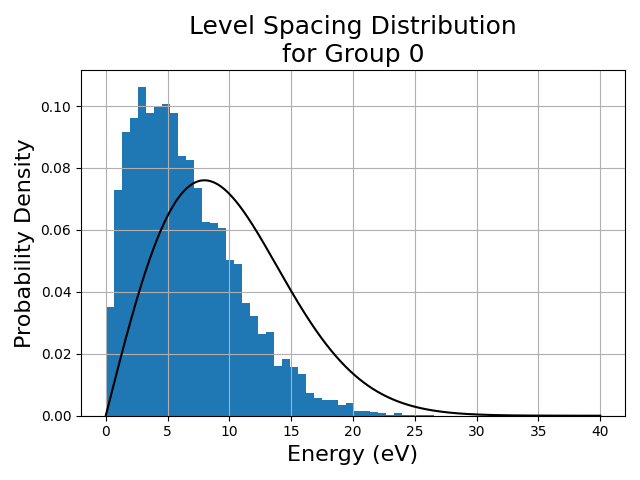

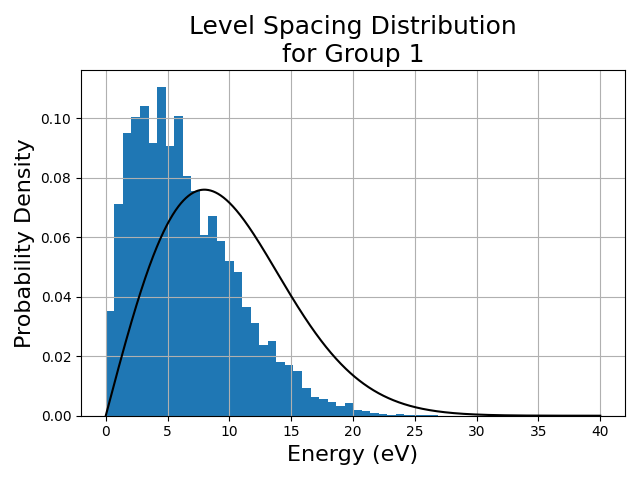

In [ ]:
for g in range(2):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(g)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
print(np.array([np.bincount(Samples[:,tr], minlength=3) for tr in range(Samples.shape[1])]))

[[766 782   3]
 [788 760   3]
 [747 802   2]
 [758 791   2]
 [774 774   3]
 [787 762   2]
 [783 766   2]
 [752 796   3]
 [766 782   3]
 [755 794   2]
 [788 761   2]
 [759 788   4]
 [782 766   3]
 [771 777   3]
 [770 780   1]
 [775 773   3]
 [750 798   3]
 [765 785   1]
 [772 776   3]
 [778 773   0]
 [790 759   2]
 [773 777   1]
 [775 774   2]
 [776 773   2]
 [804 744   3]
 [750 798   3]
 [782 766   3]
 [781 767   3]
 [786 764   1]
 [766 783   2]
 [759 789   3]
 [761 789   1]
 [769 779   3]
 [780 768   3]
 [769 779   3]
 [758 792   1]
 [761 789   1]
 [786 762   3]
 [761 786   4]
 [763 784   4]
 [788 760   3]
 [793 757   1]
 [775 774   2]
 [764 785   2]
 [774 774   3]
 [788 760   3]
 [773 776   2]
 [779 770   2]
 [771 777   3]
 [756 792   3]
 [765 782   4]
 [786 762   3]
 [768 781   2]
 [763 784   4]
 [788 761   2]
 [755 794   2]
 [761 788   2]
 [756 793   2]
 [757 794   0]
 [775 775   1]
 [774 775   2]
 [762 786   3]
 [776 773   2]
 [782 764   5]
 [773 776   2]
 [770 779   2]
 [777 773 

# Log Likelihood Test

...